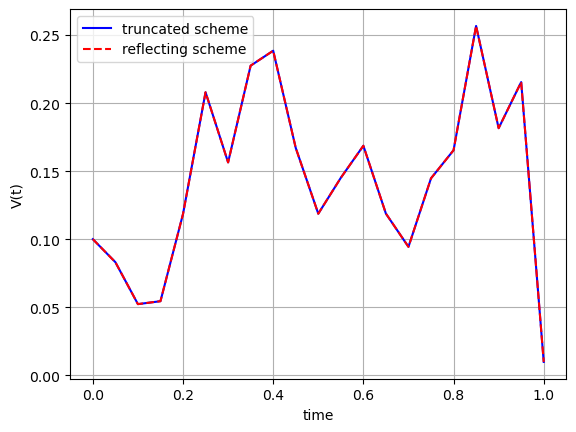

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def GeneratePathsCIREuler2Schemes(NoOfPaths,NoOfSteps,T,kappa,v0,vbar,gamma):    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
    V1 = np.zeros([NoOfPaths, NoOfSteps+1])
    V2 = np.zeros([NoOfPaths, NoOfSteps+1])
    V1[:,0]=v0
    V2[:,0]=v0
    time = np.zeros([NoOfSteps+1])
        
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        # Truncated boundary condition
        V1[:,i+1] = V1[:,i] + kappa*(vbar - V1[:,i]) * dt + gamma* np.sqrt(V1[:,i]) * (W[:,i+1]-W[:,i])
        V1[:,i+1] = np.maximum(V1[:,i+1],0.0)
        
        # Reflecting boundary condition
        V2[:,i+1] = V2[:,i] + kappa*(vbar - V2[:,i]) * dt + gamma* np.sqrt(V2[:,i]) * (W[:,i+1]-W[:,i])
        V2[:,i+1] = np.absolute(V2[:,i+1])
        time[i+1] = time[i] +dt
        
    # Outputs
    paths = {"time":time,"Vtruncated":V1,"Vreflected":V2}
    return paths

def mainCalculation():
    NoOfPaths = 1
    NoOfSteps = 20
    T     = 1
    kappa =0.5
    v0    =0.1
    vbar  =0.1
    gamma =0.8
    np.random.seed(210)
    Paths = GeneratePathsCIREuler2Schemes(NoOfPaths,NoOfSteps,T,kappa,v0,vbar,gamma)
    timeGrid = Paths["time"]
    V_truncated = Paths["Vtruncated"]
    V_reflected = Paths["Vreflected"]
    
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(V_truncated),'b')   
    plt.plot(timeGrid, np.transpose(V_reflected),'--r')   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("V(t)")
    plt.legend(['truncated scheme','reflecting scheme'])     
    
mainCalculation()